# MatplotLib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

<center><img src='figure.jpg' width=500>

[*********************100%%**********************]  4 of 4 completed


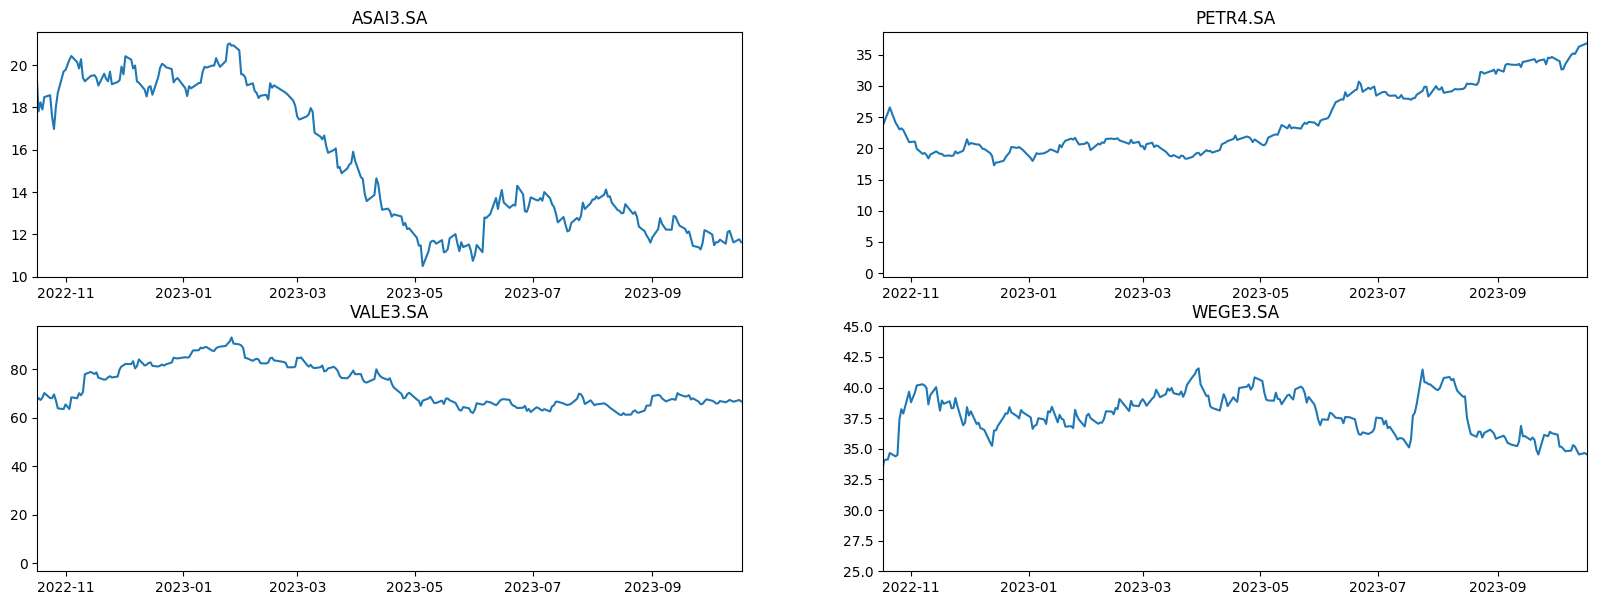

In [8]:
# plotando com limites nos eixos

cotacoes = yf.download(['WEGE3.SA', 'PETR4.SA', 'VALE3.SA', 'ASAI3.SA'])['Adj Close']

um_ano_atras = datetime.now() - timedelta(days = 365)

fig, ax = plt.subplots(2, 2, figsize = (20, 7))

coluna = 0

for i in range(2):
    for j in range(2):
        # filtrando eixo x, setando limite
        ax[i, j].set_xlim(um_ano_atras, datetime.now())

        # filtrando eixo y, setando limite minimo e maximo no gráfico
        if cotacoes.columns[coluna] == 'WEGE3.SA':
            ax[i, j].set_ylim(25, 45)
            

        ax[i, j].plot(cotacoes.index, cotacoes.iloc[:, coluna])
        ax[i, j].set_title(cotacoes.columns[coluna])
        coluna += 1
    


[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, 'cotações x Dol * log')

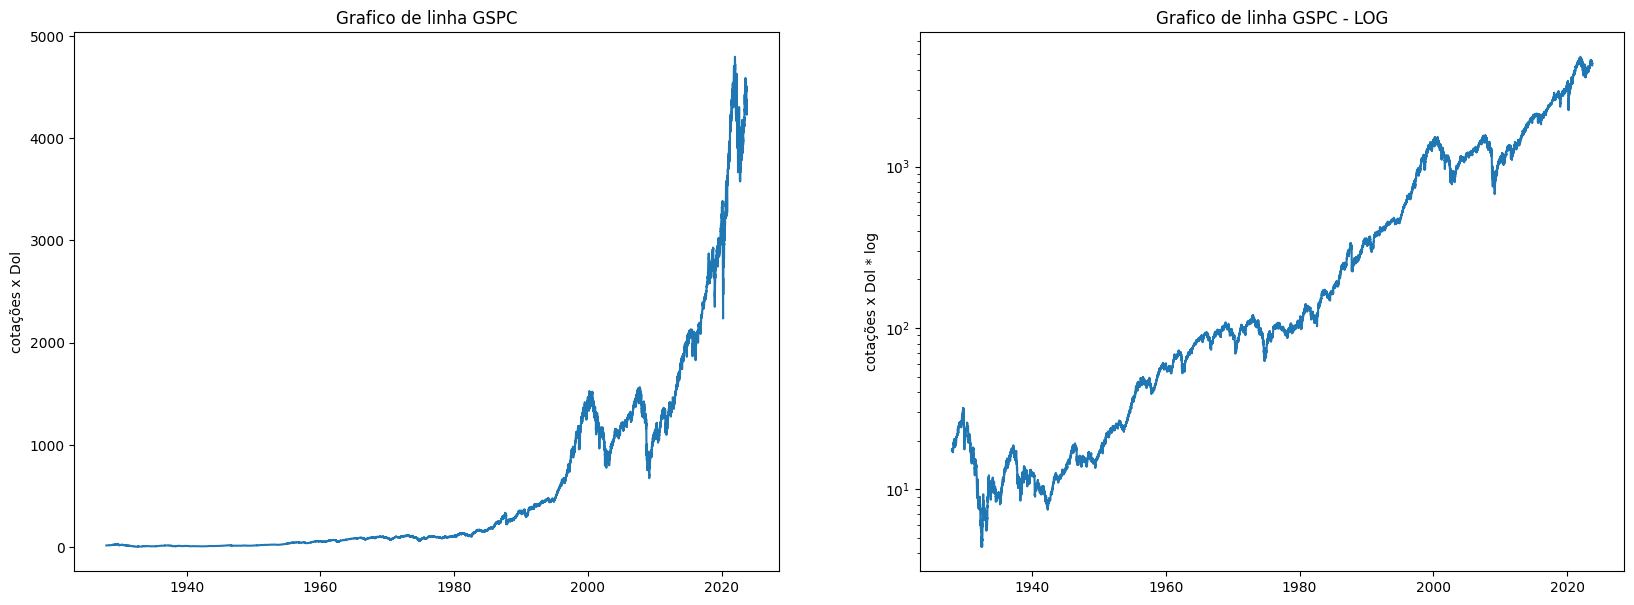

In [23]:
# alterando a escala de um eixo
# escala em log permite visualizar melhor as quedas e subidas
# expondenciais quando se tem um grafico muito comprido e achatado

cotacao = yf.download('^GSPC')['Adj Close']

fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(cotacao.index, cotacao.values) 
ax[0].set_title('Grafico de linha GSPC') 
ax[0].set_ylabel('cotações x Dol')

ax[1].plot(cotacao.index, cotacao.values) 
ax[1].set_title('Grafico de linha GSPC - LOG') 
ax[1].set_yscale('log')
ax[1].set_ylabel('cotações x Dol * log')




## Desafio
- input acao
- grafico 3 anos 1 ano 3 meses 1 mes

- grafico ibov escala linear e log


[*********************100%%**********************]  1 of 1 completed


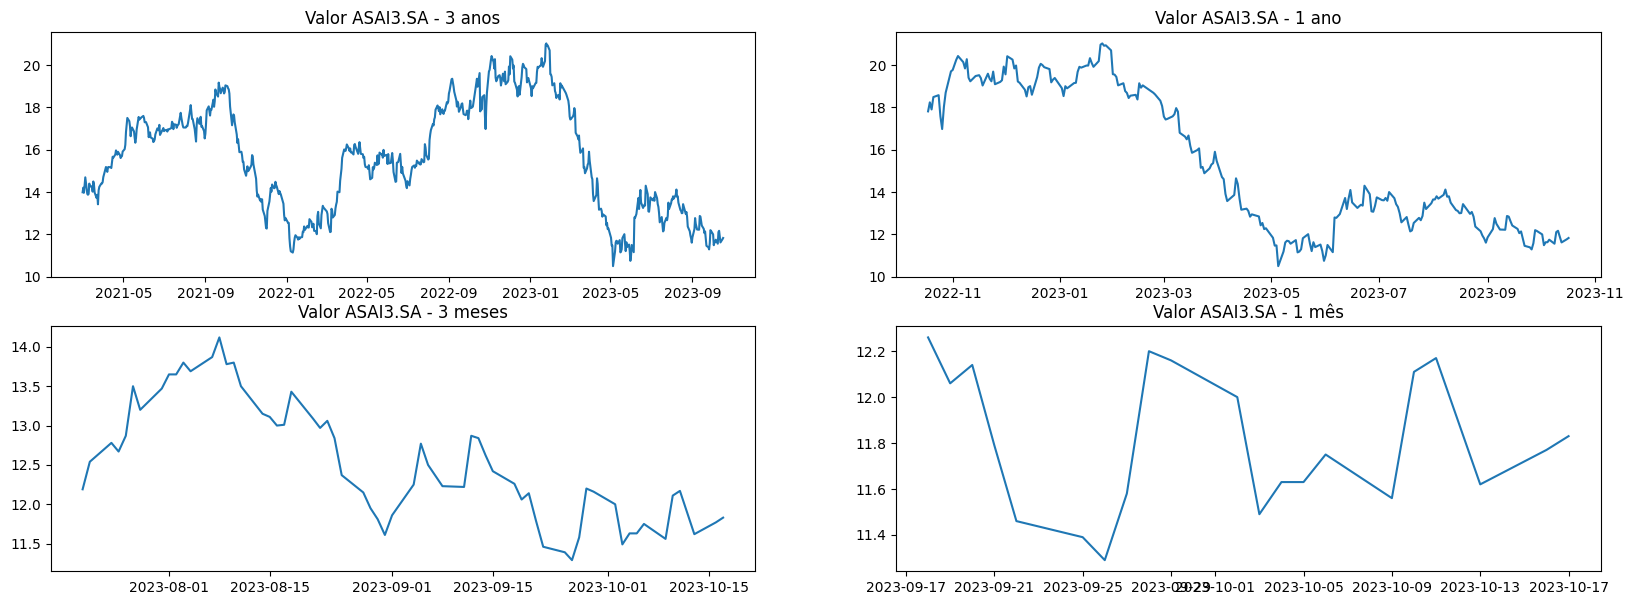

In [44]:
acao = str(input('Digite uma ação')).upper() + '.SA'
cotacao = yf.download(acao)['Adj Close']
data_hoje = datetime.now()

cotacao_3y = data_hoje - timedelta(days = 1095)
cotacao_3y = cotacao.loc[cotacao_3y:]
cotacao_3y.name = f'Valor {acao} - 3 anos'

cotacao_y = data_hoje - timedelta(days = 365)
cotacao_y = cotacao.loc[cotacao_y:]
cotacao_y.name = f'Valor {acao} - 1 ano'

cotacao_3m = data_hoje - timedelta(days = 90)
cotacao_3m = cotacao.loc[cotacao_3m:]
cotacao_3m.name = f'Valor {acao} - 3 meses'

cotacao_m = data_hoje - timedelta(days = 30)
cotacao_m = cotacao.loc[cotacao_m:]
cotacao_m.name = f'Valor {acao} - 1 mês'

df_list = [cotacao_3y, cotacao_y, cotacao_3m, cotacao_m]
fig, ax = plt.subplots(2, 2, figsize = (20, 7))

df_list_index = 0

for i in range(2):
    for j in range(2):
        ax[i, j].plot(df_list[df_list_index].index, df_list[df_list_index].values)
        ax[i, j].set_title(df_list[df_list_index].name)

        df_list_index += 1



[*********************100%%**********************]  1 of 1 completed


Text(0, 0.5, '$ * log')

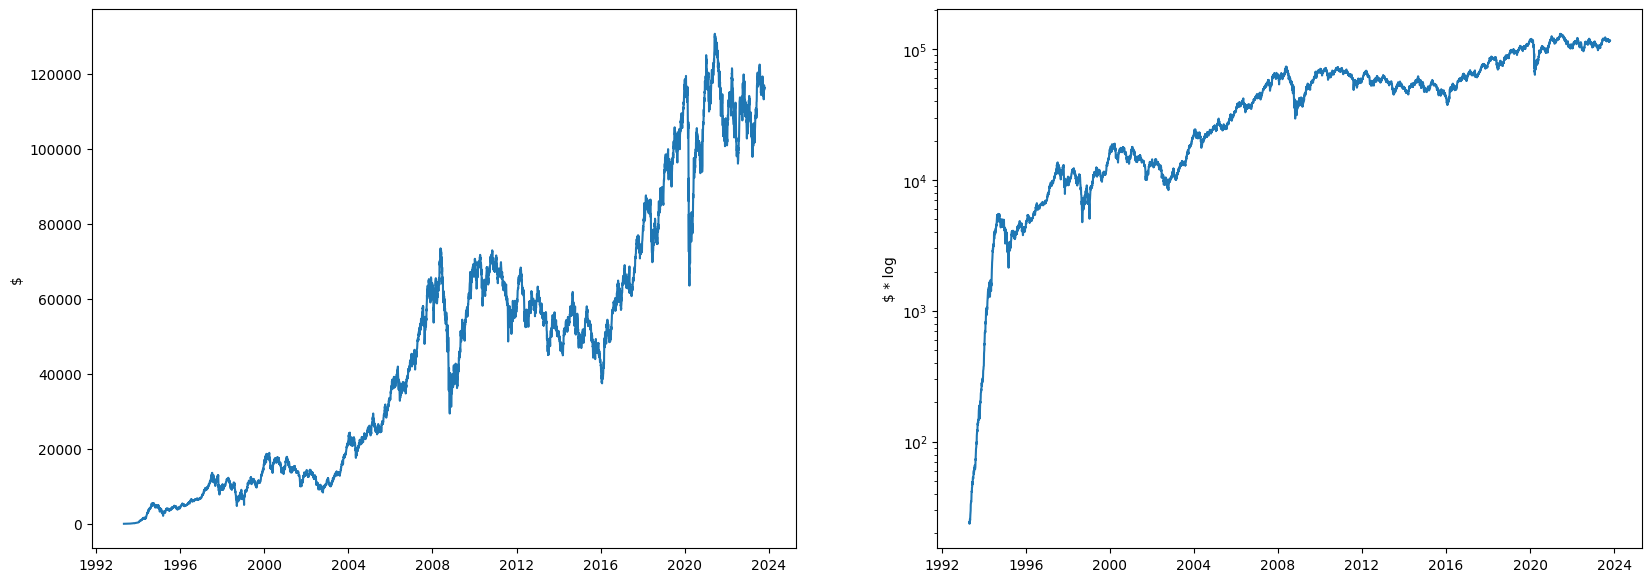

In [46]:
cotacao_ibov = yf.download('^BVSP')['Adj Close']

fig, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].plot(cotacao_ibov.index, cotacao_ibov.values)
ax[0].set_ylabel('$')

ax[1].plot(cotacao_ibov.index, cotacao_ibov.values)
ax[1].set_yscale('log')
ax[1].set_ylabel('$ * log')


